# K-Means
---
![K-Means](img/kmeans.png)

<br>**Introdução**

O K-means é um algoritmo de aprendizado de máquina não supervisionado, seu principal objetivo é tentar agrupar itens semelhantes na forma de clusters. Para cumprir seu objetivo, o K-means usa o método de distância euclidiana para descobrir a distância entre os pontos.

> Distância Euclidiana
><br>![Funcionamento](img/euclidean_distance.png)
> - Distância entre duas observações (***i*** e ***j***)
> - Corresponde à raiz quadrada da soma dos quadrados das diferenças entre os pares (***i*** e ***j***) para todas as ***p*** variáveis

<br>**Funcionamento do K-Means**

1. Determine o valor de K
2. Inicialize os centróides aleatoriamente
3. Calcule a distância de cada objeto em relação aos centróides
4. Agrupe os objetos com base na distância mínima

<br> ![Funcionamento](img/K-means_convergence.gif)

<br>**Desafios**

O K-means possui dois desafios inerentes à sua aplicação, sendo eles:
> **1. Escolha do melhor número de clusters (K): Método Elbow**
> <br><br>Frequentemente, os dados utilizados no dia-a-dia possuem várias dimensões e isso dificulta a visualização. Como consequência, o número ótimo de clusters não é mais óbvio. 
> <br><br>Felizmente, temos uma maneira de determinar isso matematicamente. Representamos graficamente a relação entre o número de clusters e a Soma dos Quadrados do Cluster (WCSS), em seguida, selecionamos o número de clusters onde a mudança no WCSS começa a se estabilizar.
<br> ![WCSS](img/wcss.png)
> <br>WCSS é definido como a soma da distância quadrada entre cada membro do cluster e seu centróide.
<br> ![WCSS Fórmula](img/wcss_formula.png)

> **2. Tratar dados com diferentes ordens de grandeza**
><br><br>Muitos algoritmos de aprendizado de máquina funcionam melhor quando os recursos estão em uma escala relativamente semelhante e próximos da distribuição normal. Algoritmos de distância como KNN, K-means e SVM são os mais afetados pela variedade e isso ocorre porque utilizam distâncias entre pontos de dados para determinar sua similaridade.
><br><br>Por exemplo, uma vez que duas variáveis têm escalas diferentes, há uma chance de que a ponderação mais alta seja dada as variáveis de maior magnitude. Consequentemente, isso afetará o desempenho do algortimo de aprendizado de máquina.


Ambos os desafios serão abordados durante os experimentos.

### Dependências

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

%matplotlib inline

### Experimento: Clustering Wine

Os dados aqui utilizados são resultados de uma análise química de vinhos cultivados na mesma região da Itália. A análise determinou 13 constituintes encontrados em cada um dos 3 tipos de vinhos. O dataset possui 178 observações.

Dataset: https://archive.ics.uci.edu/ml/datasets/wine

In [3]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['type_of_wine'] = data.target
df['type_of_wine'] = df['type_of_wine'].astype(str)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,type_of_wine
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  type_

EDA

In [5]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
df.groupby('type_of_wine').mean()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
type_of_wine,,,,,,,,,,,,,
0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
1,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
2,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


<AxesSubplot:>

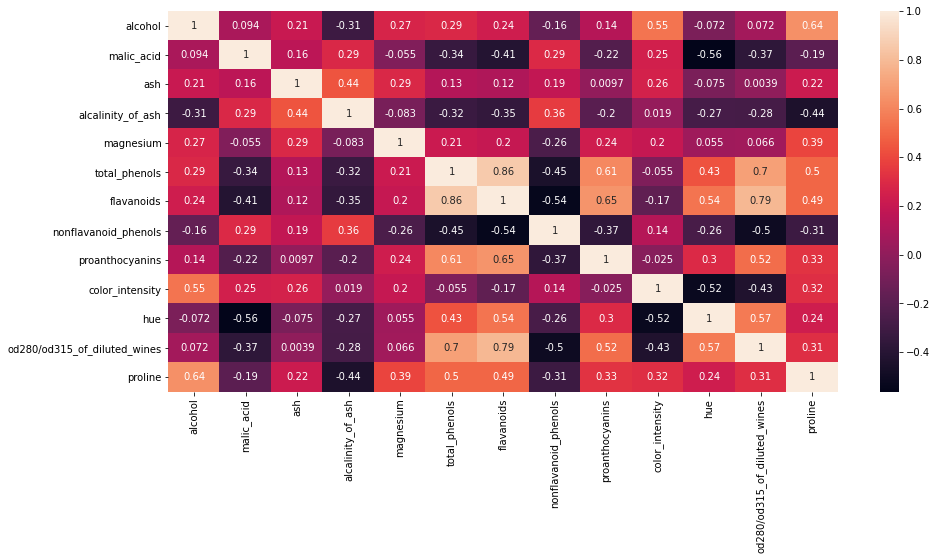

In [7]:
f, ax = plt.subplots(1,1,figsize=(15,7))
sns.heatmap(df.corr(), annot=True, ax=ax)

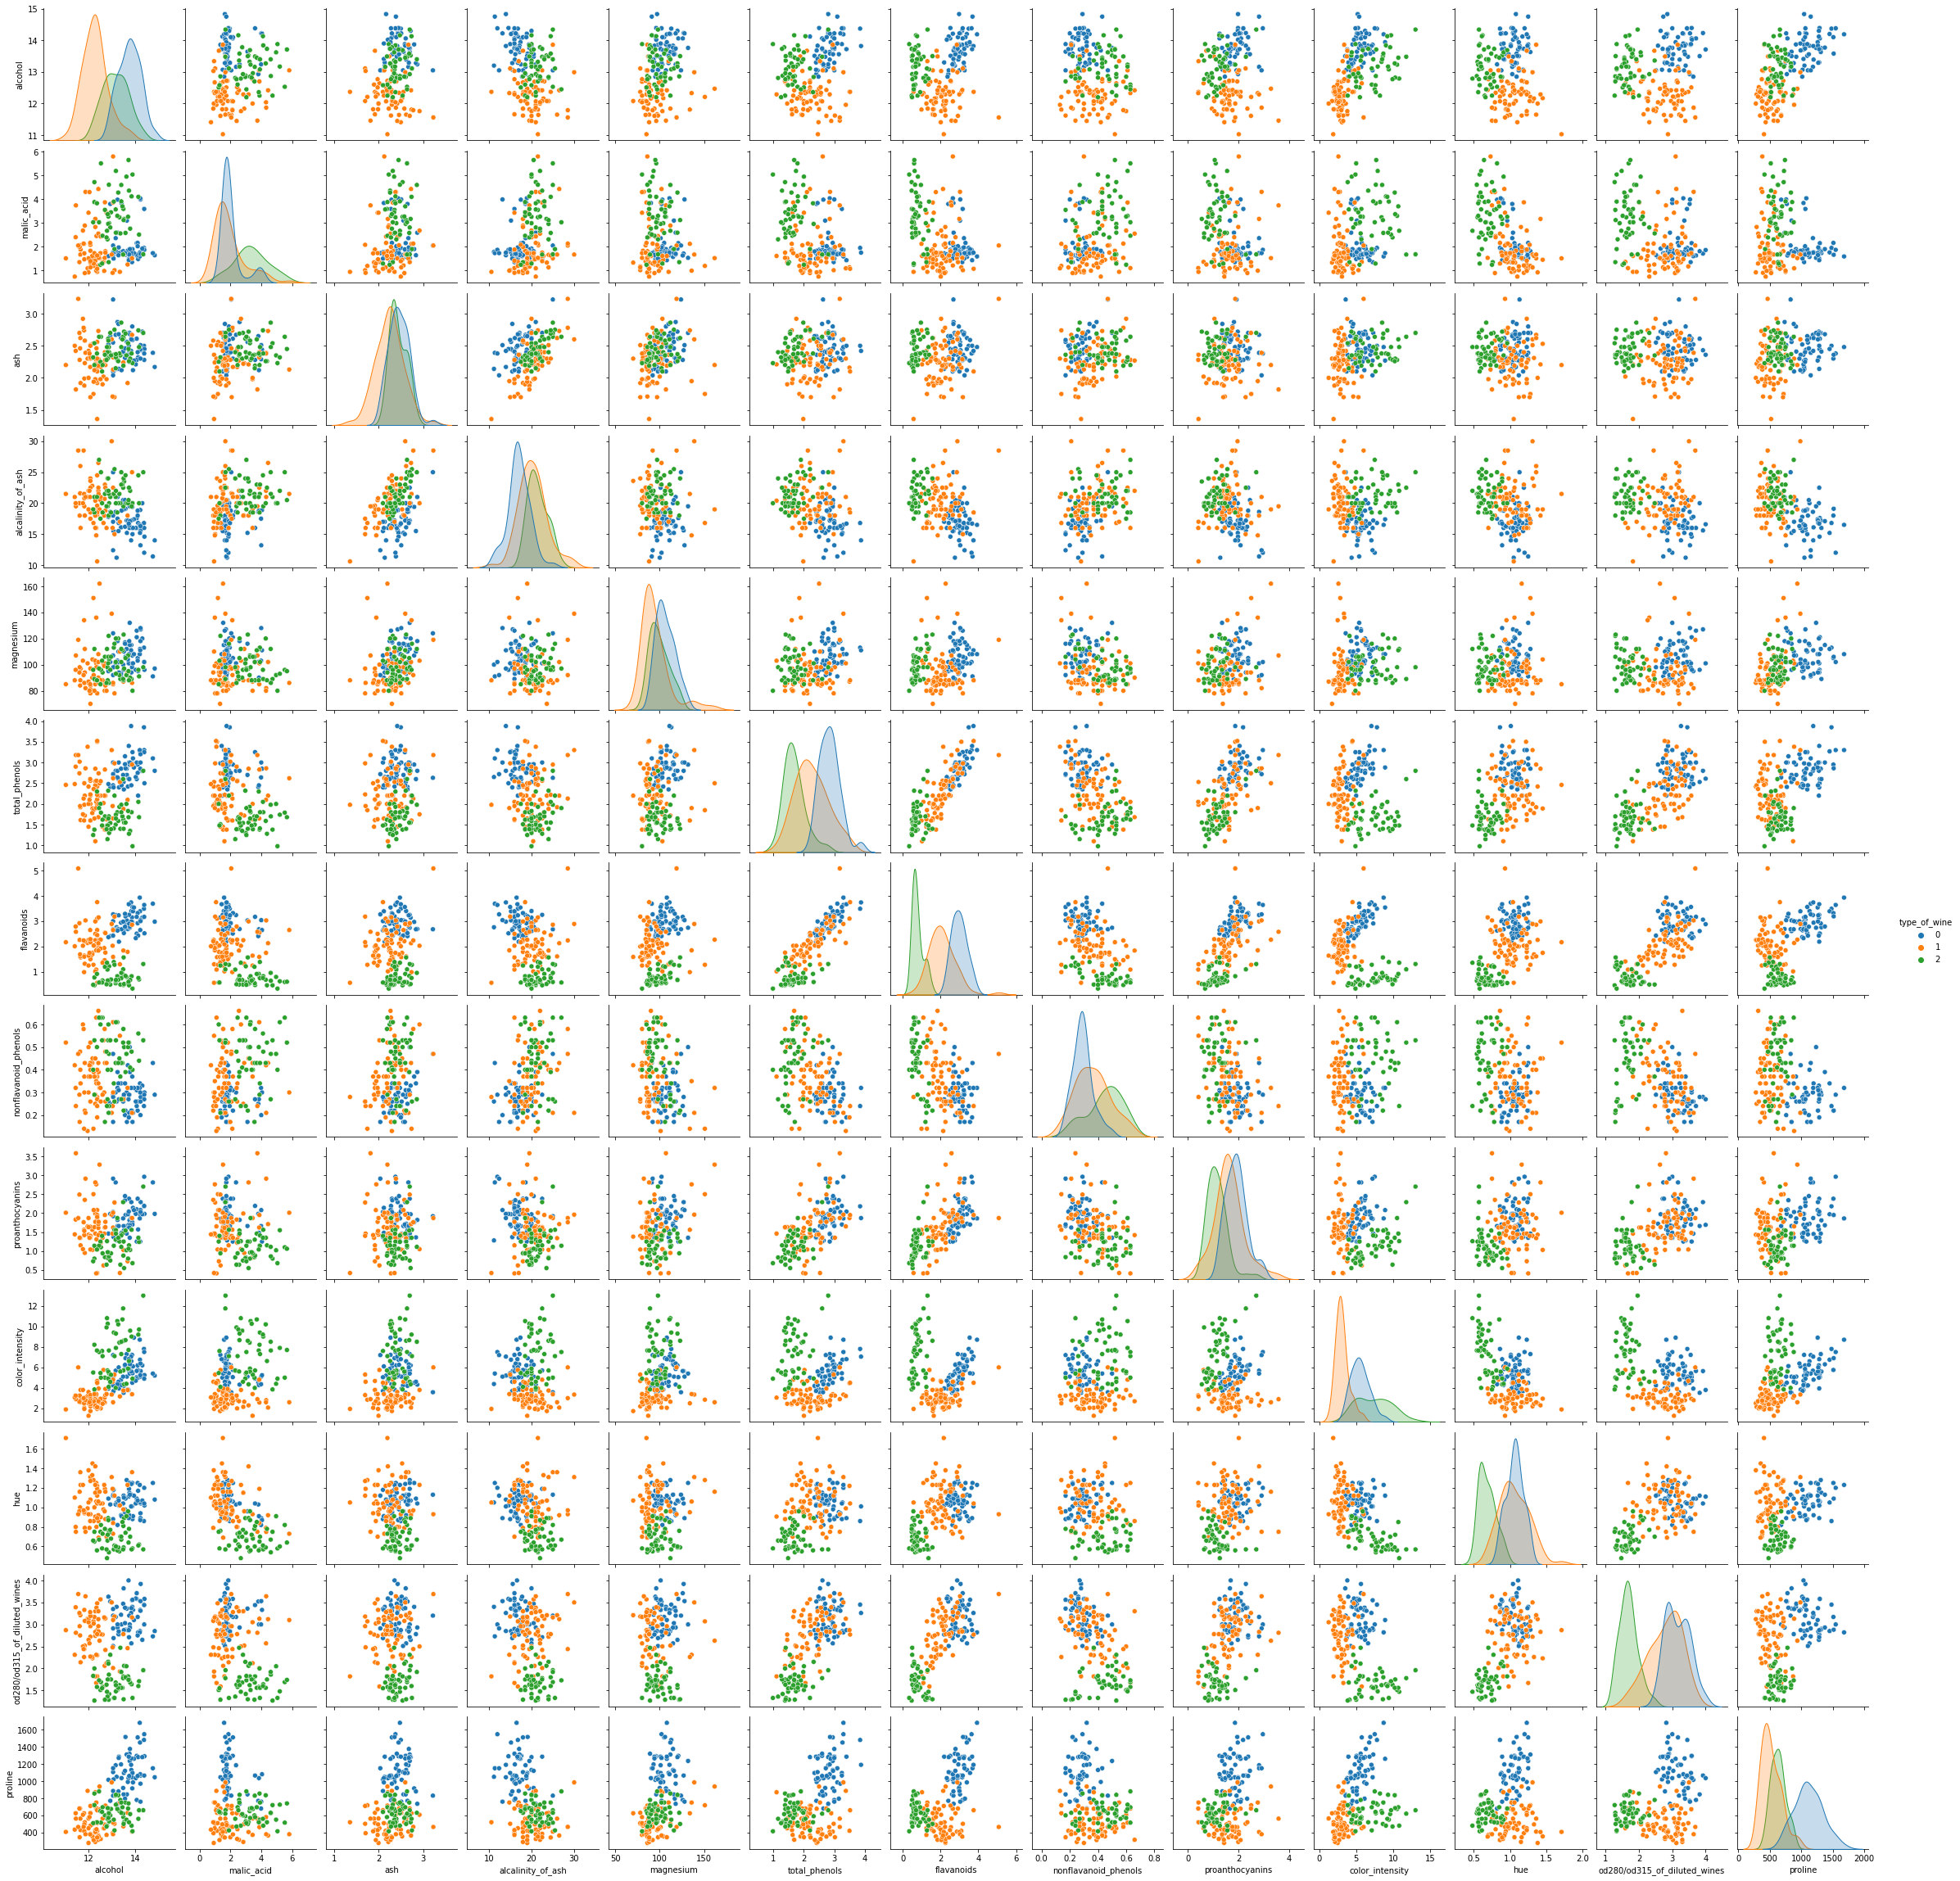

In [19]:
sns.pairplot(df, hue='type_of_wine')

Normalizando as variáveis

In [8]:
X = df.drop('type_of_wine', axis=1)

norm = MinMaxScaler().fit(X)
X_norm = norm.transform(X)

Selecionando o melhor valor de K (Elbow)

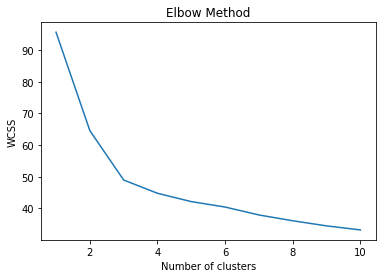

[95.5995377847106,
 64.53766702389431,
 48.95403581962662,
 44.76933054082478,
 42.14367070907487,
 40.426891205395044,
 37.92659872463095,
 36.097215020213284,
 34.48394488221388,
 33.209412438856376]

In [9]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
wcss

O método Elbow nos sugeriu exatamento o número de tipos de vinhos disponíveis no dataset. 

k = 3; <br>
inertia_ = 48.95403581962662

**K-Means**

Text(0.5, 1.0, 'y=pred_y')

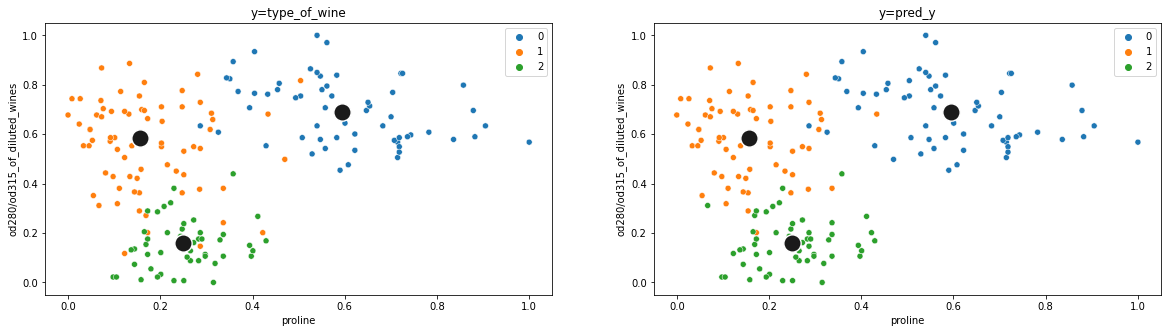

In [10]:
#Inserindo classe no dataset normalizado
df_norm = pd.DataFrame(X_norm, columns=df.drop('type_of_wine', axis=1).columns)
df_norm['type_of_wine'] = df['type_of_wine']

#Clustering
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X_norm)

#Mapeando labels para facilitar comparativo
map_pred_y = {'0':'0', '1':'2', '2':'1'}
pred_y = pd.Series(pred_y.astype(str)).map(map_pred_y)

#Plot centroides, type_of_wine e pred_y
f, ax = plt.subplots(1, 2, figsize=(20,5))
sns.scatterplot(x=df_norm['proline'], y=df_norm['od280/od315_of_diluted_wines'], hue=df_norm['type_of_wine'], ax=ax[0])
aux = sns.scatterplot(x=kmeans.cluster_centers_[:,12], y=kmeans.cluster_centers_[:,11], marker='o', s=300, color=".1", 
                ax=ax[0]).set_title('y=type_of_wine')

sns.scatterplot(x=df_norm['proline'], y=df_norm['od280/od315_of_diluted_wines'], hue=pred_y, ax=ax[1])
sns.scatterplot(x=kmeans.cluster_centers_[:,12], y=kmeans.cluster_centers_[:,11], marker='o', s=300, color=".1", 
                ax=ax[1]).set_title('y=pred_y')

Neste experimento utilizei um dataset com 178 observações distribuidas em 3 classes, ou melhor, em 3 tipos de vinhos.<br><br>
Para cumprir o objetivo do projeto (clustering), desconsiderei o rótulo já existente e reagrupei as observações a fim de comparar e avaliarmos o resultado do K-Means em um contexto controlado, onde já sabemos a qual classe as observações pertencem.

**Métrica de avaliação: Coeficiente de silhueta**

Coeficiente de silhueta ou pontuação de silhueta é uma métrica usada para calcular a eficácia de uma técnica de agrupamento. Seu valor varia de -1 a 1.

> 1 =  Os clusters estão bem separadas e são claramente distintos<br>
> 0 = Os clusters são indiferentes, ou podemos dizer que a distância entre os clusters não é significativa<br>
> -1 = Os clusters foram atribuídos de maneira incorreta

Cálculando coeficiente = (b-a) / max(a, b)
> a = distância média intra-cluster, ou seja, a distância média entra cada ponto dentro de um cluster<br>
> b = distância média entre os clusters, ou seja, a distância média entre todos os clusters

In [11]:
print(f'Silhouette Score(k=3): {silhouette_score(X_norm, pred_y)}')

Silhouette Score(k=3): 0.3013463273503232


Podemos dizer que nossos clusters possuem um coeficiente de silhueta baixo-moderado, ou seja, temos clusters muito próximos um do outro, entretanto, existe uma distinção entre eles. Um coeficiente baixo-moderado pode trazer certo grau de erro devido a proximidade dos pontos.

### Referências

- https://scikit-learn.org/stable/modules/clustering.html
- https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203
- https://ichi.pro/pt/clustering-k-means-66942525093873
- https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization
- Normalization & Standardization Sheet: https://docs.google.com/spreadsheets/d/1p3aP9y-4B1D8k1WZvc3-D4xmsG9P88h37q1yN8Y7wOM/edit#gid=0
- https://medium.com/@vitorborbarodrigues/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-acur%C3%A1cia-precis%C3%A3o-recall-quais-as-diferen%C3%A7as-c8f05e0a513c
- https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c